In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt
from sklearn.metrics import mean_squared_error

In [2]:
xls = pd.ExcelFile('../data/WorldEnergyBalancesHighlights_final.xlsx')

In [3]:
df = pd.read_excel(xls, 'TimeSeries_1971-2019',header=1,index_col=[0,1,2],usecols="A:C,Z:BB",na_values=['..','c'])
df

1990  \
Country                                 Product                  Flow                                                    
Australia                               Coal, peat and oil shale Production (ktoe)                        1.061030e+05   
                                                                 Imports (ktoe)                           0.000000e+00   
                                                                 Exports (ktoe)                          -6.726662e+04   
                                                                 Total energy supply (ktoe)               3.488774e+04   
                                                                 Electricity, CHP and heat plants (ktoe) -2.892349e+04   
...                                                                                                                ...   
IEA and Accession/Association countries Total                    Electricity output (GWh)                 9.046845e+06   
World                                   Fossil fuels             Electricity output (GWh)                 7.501510e+06   
                                        Nuclear                  Electricity output (GWh)                 2.012902e+06   
                                        Renewable sources        Electricity output (GWh)                 2.296008e+06   
                                        Total                    Electricity output (GWh)                 1.184619e+07   

                                                                                                                  1991  \
Country                                 Product                  Flow                                                    
Australia                               Coal, peat and oil shale Production (ktoe)                        1.147629e+05   
                                                                 Imports (ktoe)                           0.000000e+00   
                                                                 Exports (ktoe)                          -7.821431e+04   
                                                                 Total energy supply (ktoe)               3.627799e+04   
                                                                 Electricity, CHP and heat plants (ktoe) -2.994731e+04   
...                                                                                                                ...   
IEA and Accession/Association countries Total                    Electricity output (GWh)                 9.328546e+06   
World                                   Fossil fuels             Electricity output (GWh)                 7.635090e+06   
                                        Nuclear                  Electricity output (GWh)                 2.105787e+06   
                                        Renewable sources        Electricity output (GWh)                 2.331754e+06   
                                        Total                    Electricity output (GWh)                 1.211372e+07   

                                                                                                                  1992  \
Country                                 Product                  Flow                                                    
Australia                               Coal, peat and oil shale Production (ktoe)                        1.191394e+05   
                                                                 Imports (ktoe)                           0.000000e+00   
                                                                 Exports (ktoe)                          -8.201214e+04   
                                                                 Total energy supply (ktoe)               3.683188e+04   
                                                                 Electricity, CHP and heat plants (ktoe) -3.072018e+04   
...                                                                                   

In [4]:
br = df.loc[('Brazil')]
br

1990  \
Product                  Flow                                                   
Coal, peat and oil shale Production (ktoe)                          1931.4685   
                         Imports (ktoe)                             7904.0236   
                         Exports (ktoe)                                0.0000   
                         Total energy supply (ktoe)                 9671.0042   
                         Electricity, CHP and heat plants (ktoe)   -1502.8617   
...                                                                       ...   
Total                    Other final consumption (ktoe)            15829.1115   
Fossil fuels             Electricity output (GWh)                  10017.0000   
Nuclear                  Electricity output (GWh)                   2237.0000   
Renewable sources        Electricity output (GWh)                 210567.0000   
Total                    Electricity output (GWh)                 222821.0000   

                                                                         1991  \
Product                  Flow                                                   
Coal, peat and oil shale Production (ktoe)                          2115.3928   
                         Imports (ktoe)                             8701.2099   
                         Exports (ktoe)                                0.0000   
                         Total energy supply (ktoe)                11056.9885   
                         Electricity, CHP and heat plants (ktoe)   -1730.6859   
...                                                                       ...   
Total                    Other final consumption (ktoe)            15296.4559   
Fossil fuels             Electricity output (GWh)                  11154.0000   
Nuclear                  Electricity output (GWh)                   1442.0000   
Renewable sources        Electricity output (GWh)                 221781.0000   
Total                    Electricity output (GWh)                 234377.0000   

                                                                         1992  \
Product                  Flow                                                   
Coal, peat and oil shale Production (ktoe)                          1886.5141   
                         Imports (ktoe)                             8376.9024   
                         Exports (ktoe)                               -3.9900   
                         Total energy supply (ktoe)                10701.7580   
                         Electricity, CHP and heat plants (ktoe)   -1736.8784   
...                                                                       ...   
Total                    Other final consumption (ktoe)            15591.3750   
Fossil fuels             Electricity output (GWh)                  11731.0000   
Nuclear                  Electricity output (GWh)                   1759.0000   
Renewable sources        Electricity output (GWh)                 228242.0000   
Total                    Electricity output (GWh)                 241732.0000   

                                                                         1993  \
Product                  Flow                                                   
Coal, peat and oil shale Production (ktoe)                          1832.8766   
                         Imports (ktoe)                             8881.1814   
                         Exports (ktoe)                                0.0000   
                         Total energy supply (ktoe)                11010.8661   
                         Electricity, CHP and heat plants (ktoe)   -1656.4288   
...                                                                       ...   
Total                    Other final consumption (ktoe)            16011.7609   
Fossil fuels             Electricity output (GWh)                  11515.0000   
Nuclear                  Electricity output (GWh)                    442.0000   
Renewable sources   

In [5]:
renew = br.loc[('Renewables and waste')]
renew

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Flow,,,,,,,,,,,,,,,,,,,,,
Production (ktoe),65002.1367,66087.2773,65501.8893,65864.0677,69291.1687,68390.0230,69922.3527,73480.8248,73507.2564,74532.4023,...,110930.8941,118586.4067,115842.9204,116383.2885,117808.2989,118554.0858,120122.8868,122346.9480,123638.3460,129643.2400
Imports (ktoe),599.5830,556.7881,280.3517,743.4365,964.5863,1258.9895,680.1946,465.6494,94.0374,199.1872,...,0.6460,39.3912,600.9325,291.2863,68.0404,511.2926,431.5521,434.8372,974.8926,947.1150
Exports (ktoe),0.0000,0.0000,0.0000,-98.5686,-156.4170,-211.8413,-110.8807,-92.6906,-78.2805,-212.4553,...,-1714.7334,-983.5252,-1017.0953,-1601.8271,-1542.9669,-766.3987,-1107.3653,-935.4194,-728.4531,-883.4093
Total energy supply (ktoe),65538.4044,65936.4370,65779.7210,66669.8115,70051.2327,69430.8711,70425.2015,72924.5741,73640.0592,75195.8032,...,110127.2952,116836.6784,115265.8834,114847.2961,116083.9364,117427.5954,120353.4237,122005.3515,123638.7267,128864.0641
"Electricity, CHP and heat plants (ktoe)",-18516.2606,-19554.9155,-20160.3086,-21202.4218,-21934.8906,-22945.8297,-24195.6770,-25450.9554,-26554.4187,-26852.2069,...,-37970.2541,-40651.3709,-42957.6643,-42628.6439,-41575.0135,-41659.8869,-41748.6872,-44716.7055,-45029.2486,-47574.7881
"Oil refineries, transformation (ktoe)",0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Total final consumption (ktoe),33667.5696,33046.0912,33176.0441,33051.9957,34952.0486,34129.0042,34198.6923,34634.6122,35752.6425,37497.7546,...,55718.7210,59329.1895,57227.9577,57271.1671,58224.3966,59357.0633,61858.4791,61782.0712,63237.6012,63403.8898
Industry (ktoe),16852.4224,16106.5105,16599.9386,17302.9251,19041.8894,18674.9638,18629.6645,19254.3472,20443.1214,22001.6473,...,31563.1164,34404.0078,34498.9408,35247.6437,34655.9543,33804.1012,33014.2212,34967.3672,35125.3984,31818.5175
Transport (ktoe),5857.6029,6105.7023,5972.9282,6228.3945,6643.7911,6869.2421,7151.8429,6910.0551,6782.9739,6798.4531,...,13156.2329,14065.6267,12415.9948,11685.5502,13765.6391,15142.5077,17922.8905,16351.5261,16602.2600,19191.3227


<AxesSubplot:>

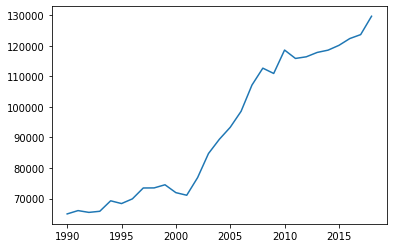

In [6]:
renew= renew.transpose()
renew['Production (ktoe)'].describe()
renew['Production (ktoe)'].plot()

In [7]:
def dickeyF(dados):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(dados, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
def diferencia(serie):
    val = True
    res = pd.Series(index=serie.index[1:])
    ant = 0
    for i in serie.index[1:]:
        if val:
            ant = serie.index[0]
            val = False
        res[i] = serie[i] - serie[ant]
        ant = i
    return res
def difreverse(serie, diferenciado):
    res = diferenciado.copy()
    val = True
    ant = 0
    for i in serie.index[2:]:
        if val:
            ant = serie.index[1]
            val = False
        res[i] = res[i] + serie[ant]
        ant = i
    res = res.append(serie.head(1))
    res = res.append(serie.head(2))
    res.sort_index(inplace=True)
    return res

In [8]:
renew['Production (ktoe)']

1990     65002.1367
1991     66087.2773
1992     65501.8893
1993     65864.0677
1994     69291.1687
1995     68390.0230
1996     69922.3527
1997     73480.8248
1998     73507.2564
1999     74532.4023
2000     71958.8002
2001     71107.6301
2002     76882.9909
2003     84747.8095
2004     89406.0759
2005     93324.0329
2006     98558.1409
2007    107139.6195
2008    112667.5384
2009    110930.8941
2010    118586.4067
2011    115842.9204
2012    116383.2885
2013    117808.2989
2014    118554.0858
2015    120122.8868
2016    122346.9480
2017    123638.3460
2018    129643.2400
Name: Production (ktoe), dtype: float64

<AxesSubplot:>

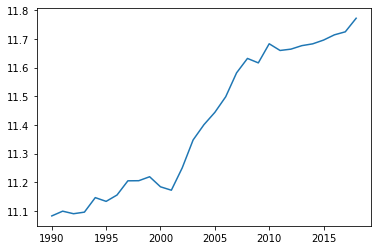

In [9]:
log = pd.Series(np.log(renew['Production (ktoe)']))
log.plot()

/home/zeneto/Documents/GitHub/CDD/AmbienteCDD/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  # Remove the CWD from sys.path while we load stuff.


<AxesSubplot:>

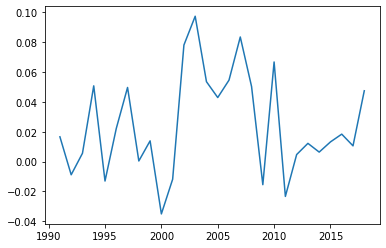

In [10]:
series = diferencia(log)
series.plot()

Results of Dickey-Fuller Test:
Test Statistic                 -3.937605
p-value                         0.001775
#Lags Used                      0.000000
Number of Observations Used    27.000000
Critical Value (1%)            -3.699608
Critical Value (5%)            -2.976430
Critical Value (10%)           -2.627601
dtype: float64


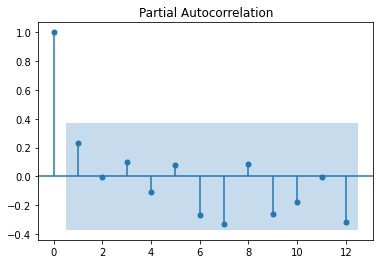

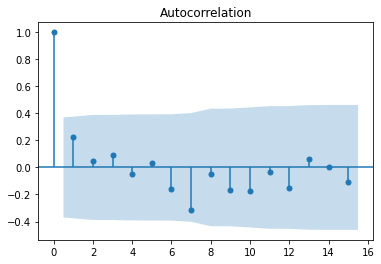

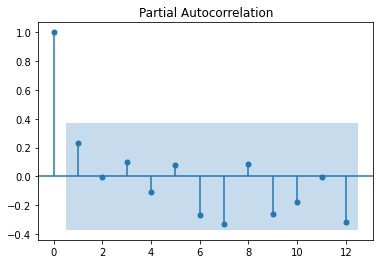

In [11]:
dickeyF(series)
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series)
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(series, lags = 12)

/home/zeneto/Documents/GitHub/CDD/AmbienteCDD/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/zeneto/Documents/GitHub/CDD/AmbienteCDD/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
stats

predicted=0.052043, expected=-0.015534
predicted=0.014051, expected=0.066734
predicted=0.082983, expected=-0.023407
predicted=-0.004762, expected=0.004654
predicted=0.016608, expected=0.012170
predicted=0.006426, expected=0.006311
predicted=0.003265, expected=0.013146
predicted=0.011111, expected=0.018346
predicted=0.013926, expected=0.010500
predicted=0.012352, expected=0.047426
Test RMSE: 0.045


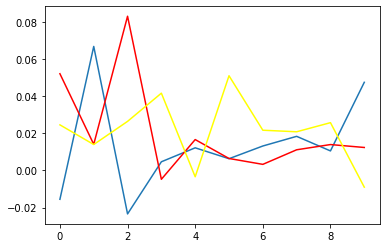

In [12]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
model = ARIMA(history, order=(3,0,1))
model_fit = model.fit()
predt = model_fit.predict(start=1, end= 10)
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(3,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.plot(predt, color='yellow')
plt.show()

<AxesSubplot:>

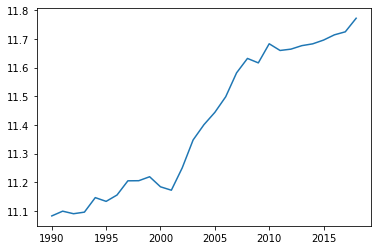

In [13]:
log.plot()